In [1]:
import pandas as pd 
import numpy as np 
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer, StandardScaler

# Load Data

In [3]:
column_names = []
dataset = pd.read_csv('life_expectancy.csv')
dataset

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,Afghanistan,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9
2,Afghanistan,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9
3,Afghanistan,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5
4,Afghanistan,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,723.0,27,4.36,0.000000,68.0,31,27.1,...,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,44.3
2934,Zimbabwe,2003,Developing,715.0,26,4.06,0.000000,7.0,998,26.7,...,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,44.5
2935,Zimbabwe,2002,Developing,73.0,25,4.43,0.000000,73.0,304,26.3,...,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,44.8
2936,Zimbabwe,2001,Developing,686.0,25,1.72,0.000000,76.0,529,25.9,...,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,45.3


# Inspect Data

In [4]:
# remove all empty spaces and remove all capital letters for ease of use and clearity. 
dataset.rename(columns=(lambda x : x.strip().lower()), inplace=True)

# check the predictable column. 
print('-------- LIFE EXPECTANCY --------')
print(dataset['life expectancy'].describe())
print(' --------------------------------- ')
# this data has some outliers that might need to be regularized. 

-------- LIFE EXPECTANCY --------
count    2938.000000
mean       69.234717
std         9.509115
min        36.300000
25%        63.200000
50%        72.100000
75%        75.600000
max        89.000000
Name: life expectancy, dtype: float64
 --------------------------------- 


# Clean Dataset

In [5]:
# drop country from dataset. we want to generalize accross all countrys. 
dataset = dataset.drop(columns=['country'])
dataset = dataset.drop(columns=['status'])
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   year                             2938 non-null   int64  
 1   adult mortality                  2938 non-null   float64
 2   infant deaths                    2938 non-null   int64  
 3   alcohol                          2938 non-null   float64
 4   percentage expenditure           2938 non-null   float64
 5   hepatitis b                      2938 non-null   float64
 6   measles                          2938 non-null   int64  
 7   bmi                              2938 non-null   float64
 8   under-five deaths                2938 non-null   int64  
 9   polio                            2938 non-null   float64
 10  total expenditure                2938 non-null   float64
 11  diphtheria                       2938 non-null   float64
 12  hiv/aids            

# Create Features and Labels

In [45]:
# create labels
labels = dataset['life expectancy']
# create features
features = dataset.iloc[:,0:len(dataset.columns)-1]


# collect a list of column names from features 
feature_column_names = []
for i in features:
    feature_column_names.append(i)
# features = pd.get_dummies(features, columns=feature_column_names)

# feature_column_dummy_names = []
# for i in features:
#     feature_column_dummy_names.append(i)

# Split Data

In [46]:
# Create a training set and validation set
f_train, f_test, l_train, l_test = train_test_split(features, labels, test_size=.2, random_state= 21)

# PreProcess Features 

In [47]:
# normalize the numerical data to be useful
ct = ColumnTransformer([('normilize', Normalizer(), feature_column_dummy_names)], remainder='passthrough')
f_train_scaled = ct.fit_transform(f_train)
f_test_scaled = ct.transform(f_test)

# Build Model

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense
from tensorflow.keras import layers

learning_rate = 0.002

my_model = Sequential()
input = InputLayer(f_train.shape[1]) # number of input layers from the number of features
my_model.add(input) # added input layers 
my_model.add(layers.Dense(1, activation='linear'))
opt = tf.keras.optimizers.Adamax(learning_rate = learning_rate) #setting the learning rate of Adam to the one specified in the function parameter
my_model.compile(loss='mse', metrics=['mae'], optimizer=opt) # output parameters to look at

In [49]:
history = my_model.fit(f_train_scaled, l_train, epochs=20, batch_size=12, verbose=1, validation_data= (f_test_scaled, l_test))   
train_mse , train_mae = my_model.evaluate(f_train_scaled, l_train, verbose=0)
mse , mae = my_model.evaluate(f_test_scaled, l_test, verbose=0)
print(mse, mae)

Epoch 1/20
196/196 [==============================] - 1s 4ms/step - loss: 4830.1313 - mae: 68.8486 - val_loss: 4838.9292 - val_mae: 68.9252
Epoch 2/20
196/196 [==============================] - 1s 3ms/step - loss: 4747.3711 - mae: 68.2530 - val_loss: 4756.6284 - val_mae: 68.3324
Epoch 3/20
196/196 [==============================] - 1s 3ms/step - loss: 4666.5342 - mae: 67.6649 - val_loss: 4675.8823 - val_mae: 67.7455
Epoch 4/20
196/196 [==============================] - 1s 3ms/step - loss: 4586.9966 - mae: 67.0828 - val_loss: 4596.8052 - val_mae: 67.1656
Epoch 5/20
196/196 [==============================] - 1s 3ms/step - loss: 4508.7686 - mae: 66.5036 - val_loss: 4517.9053 - val_mae: 66.5823
Epoch 6/20
196/196 [==============================] - 1s 3ms/step - loss: 4430.0669 - mae: 65.9185 - val_loss: 4439.2261 - val_mae: 65.9954
Epoch 7/20
196/196 [==============================] - 1s 3ms/step - loss: 4352.4453 - mae: 65.3339 - val_loss: 4361.0098 - val_mae: 65.4064
Epoch 8/20
196/196 [

In [11]:
print('Training MSE: ', train_mse,'Training MAE : ',  train_mae)
print('Testing MSE: ',mse,'Testing MAE: ', mae)

Training MSE:  68.62429809570312 Training MAE :  6.653829574584961
Testing MSE:  69.81774139404297 Testing MAE:  6.594973087310791


In [21]:
from sklearn.metrics import accuracy_score
labels_test = l_test[:3]
y_pred = my_model.predict(f_test_scaled[:3])
print(y_pred)
print(labels_test)

1/1 [==============================] - 0s 34ms/step
[[67.656265]
 [67.64993 ]
 [70.33286 ]]
1556    64.7
1787    59.2
2845    71.4
Name: life expectancy, dtype: float64


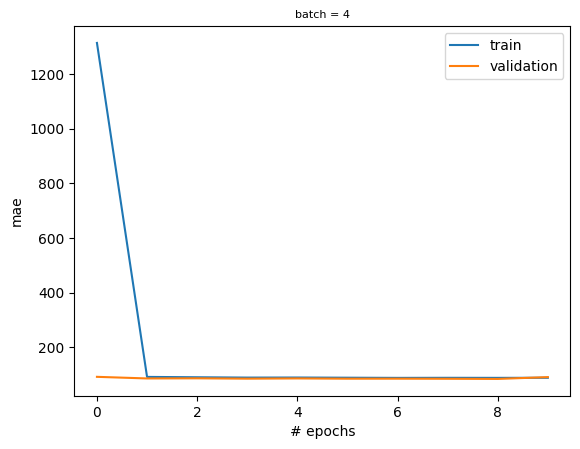

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('batch = 4', fontdict={'fontsize': 8, 'fontweight': 'medium'})
plt.xlabel('# epochs')
plt.ylabel('mae')
plt.legend()